<a href="https://colab.research.google.com/github/crinex/what-is-neural_network/blob/main/Neural_Network2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MNIST 
- MNIST 데이터는 C언어의 Hello, world 격의 예제이다.


In [1]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


- 학습데이터 : 모델을 학습 시킬때 사용하는 데이터
- 훈련데이터 : 모델의 성능을 확인할때 사용하는 데이터

### Data Visualization
- 입력 데이터 확인

In [3]:
print('train_images shape is ', train_images.shape)

train_images shape is  (60000, 28, 28)


- batch_size : 60000개
- input_demention : 28x28 

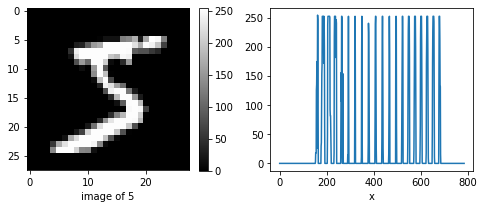

In [7]:
pick_image = 0 # 0 ~ 59999

plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
# 이미지(image) 확인
plt.imshow(train_images[pick_image], cmap='gray')
plt.colorbar()
plt.xlabel('image of {}'.format(train_labels[pick_image]))
plt.subplot(1,2,2)
# 픽셀(pixel)값 분포
plt.plot(train_images[0].flatten())
plt.xlabel('x')
plt.show()

- 출력 데이터 확인

In [8]:
print('train_labels shape is', train_labels.shape)

train_labels shape is (60000,)


- batch_size : 60000
- input_demention : 1

- 이미지 픽셀값(28x28)784개를 입력변수로 사용하고 숫자값(0~9) 10개를 출력변수로 사용한다.

## Data Transform
- 벡터화(Flatten) : 입력 데이터의 2D shape를 1D(784,)로 변환해준다.

In [9]:
batch_size = train_images.shape[0]
input_dim = train_images.shape[1] * train_images.shape[2]
X_train = np.reshape(train_images, (batch_size, input_dim))
print(X_train.shape)

batch_size = test_images.shape[0]
input_dim = test_images.shape[1] * test_images.shape[2]
X_test = np.reshape(test_images, (batch_size, input_dim))
print(X_test.shape)

(60000, 784)
(10000, 784)


In [10]:
from keras.utils import to_categorical

In [11]:
Y_train = to_categorical(train_labels)
Y_test = to_categorical(test_labels)
print('Y_train.shape is', Y_train.shape)
print('Y_test.shape is', Y_test.shape)

Y_train.shape is (60000, 10)
Y_test.shape is (10000, 10)


In [13]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Neural Network Modeling
- 우선 3-Layer로 만들어보자
1. 데이터 변환

  - 입력 데이터의 형식과 모양을 변환 2D -> 1D
  - 출력 데이터의 형식과 모양을 변환 One-Hot Encoding
2. 히든 레이어 정의

  - 히든 레이어의 개수를 정한다. 여기서는 2-히든 레이어 사용
  - 히든 레이어의 유닛수를 정한다. 여기서는 128개, 84개 사용
  - 활성함수를 정의한다. 여기서는 ReLU 사용

3. 출력 레이어 정의

  - 출력 레이어의 유닛 개수를 정의한다. 여기서는 10개의 클래스를 분류해야하니 10개 유닛사용
  - 활성함수를 정의한다, 여기서는 softmax 사용

4. 손실함수 정의

  - cross-entropy를 사용한다.
5. 옵티마이저를 정의한다.

  - adam을 사용한다.

6. 학습 횟수를 설정한다.
7. 주어진 조건으로 모델을 최적화 한다.


### ReLU(Rectified Linear Unit)
- a = max(0, z)
- sigmoid 함수는 이진분류 모델에 적합한 함수다. 
- relu 함수는 0보다 작은 값은 0으로 반환하고 0보다 큰값은 그대로 반환해준다.
- 따라서 히든레이어에서는 relu로 활성화함수를 사용하고 마지막 출력 레이어에서 sigmoid를 사용하는것이 좋다.

### Adam(Adaptiva moment estimation)
- 빠르고 부드럽게 최소값을 찾아간다.
- 그냥 사용하자

### Modeling

In [15]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [17]:
from keras import Sequential
from keras.layers import Dense, Flatten

In [18]:
model = Sequential()

In [19]:
model.add(Dense(128, input_shape=(784,), activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [20]:
hist = model.fit(X_train, Y_train, epochs=20, verbose=0)

In [26]:
train_acc = hist.history['accuracy'][-1]
train_loss = hist.history['loss'][-1]

print('train_acc :', train_acc)
print('train_loss :', train_loss)

train_acc : 0.978683352470398
train_loss : 0.06824558228254318


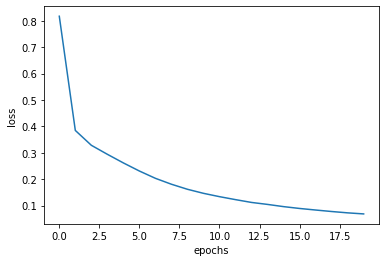

In [27]:
plt.plot(hist.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [28]:
test_loss, test_acc = model.evaluate(X_test, Y_test)

print('Test Accuracy : ', test_acc)
print('Test Loss : ', test_loss)

313/313 [==============================] - 1s 1ms/step - loss: 29.2278 - accuracy: 0.9221
Test Accuracy :  0.9221000075340271
Test Loss :  29.22779083251953


 - 훈련 정확도와 테스트 정확도가 차이가 난다. 이런 경우 과적합 현상이 일어났다고 볼 수 있다.
 - 과적합을 해결하기 위해서 규제, 드롭아웃 방법이 있다.
 - 규제는 가중치의 역할을 줄여 줌으로서 모델을 약간 바보로 만들어 준다.

In [30]:
from tensorflow.keras import regularizers

model_l2 = Sequential()
model_l2.add(Dense(128, input_shape=(784,), kernel_regularizer=regularizers.l2(0.0001), activation='relu'))
model_l2.add(Dense(84, kernel_regularizer=regularizers.l2(0.0001), activation='relu'))
model_l2.add(Dense(10, activation='softmax'))
model_l2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

hist = model_l2.fit(X_train, Y_train, epochs=20, verbose=0)
train_acc_l2 = hist.history['accuracy'][-1]
train_loss_l2 =  hist.history['loss'][-1]

print('train accuracy: ', train_acc_l2)
print('train loss: ', train_loss_l2)

train accuracy:  0.9466166496276855
train loss:  0.3279263973236084


In [31]:
test_loss_l2, test_acc_l2 = model_l2.evaluate(X_test, Y_test)

print('Test Accuracy :', test_acc_l2)
print('Test Loss :', test_loss_l2)

313/313 [==============================] - 1s 1ms/step - loss: 18.0709 - accuracy: 0.8853
Test Accuracy : 0.8852999806404114
Test Loss : 18.070852279663086


In [32]:
import pandas as pd

df = pd.DataFrame(data=[[train_acc, test_acc], [train_acc_l2, test_acc_l2]],
                  index=['model', 'model_l2'],
                  columns=['train accuracy', 'test accuracy'])
df

,train accuracy,test accuracy
model,0.978683,0.9221
model_l2,0.946617,0.8853


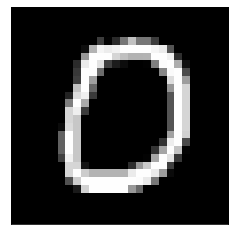

predicted digit is  0


In [33]:
pick_image = 10 # 0 ~ 9999

def predict_handwrittendigits(x):
    x_data = np.reshape(x, (1, 784))
    predict = model_l2.predict(x_data)
    return np.argmax(predict)

test_data = test_images[pick_image]
result = predict_handwrittendigits(test_data)

plt.imshow(test_data, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()
print('predicted digit is ', result)